# Recommandations de bijoux

In [7]:
import numpy as np
from scipy import signal
from scipy import interpolate
from PIL import Image
import matplotlib.pyplot as plt
import numpy.linalg as npl
import os

## Accès aux données

In [8]:
def Contenu_Dossier(path_dossier):
    
    path=path_dossier

    liste_noms = os.listdir(path_dossier)
    liste_chemins=[]
    for name in liste_noms:
        if name[-4]!='.':
            liste_noms2, liste_chemins2=Contenu_Dossier(path_dossier+'/'+name)
            liste_noms+=liste_noms2
            liste_chemins+=liste_chemins2
        if name[-4:] == '.jpg':
            liste_chemins+=[path_dossier+"/"+name]
        else:
            pass
        
    return liste_noms, liste_chemins
    

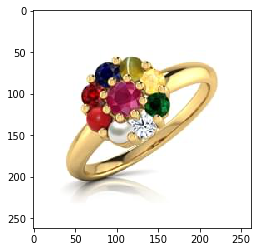

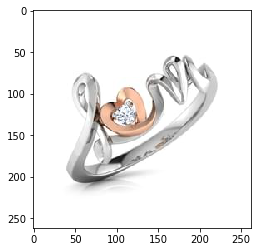

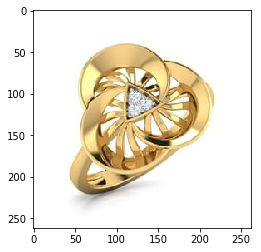

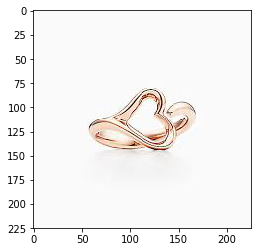

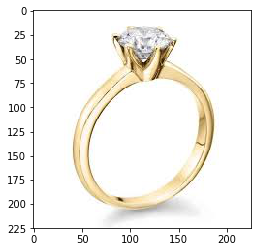

In [9]:
l_noms, l_chemins = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")


for i in range(5):
    plt.imshow(plt.imread(l_chemins[i]))
    plt.show()

## KNN with mnist

In [10]:
from sklearn import datasets
mnist = datasets.load_digits()

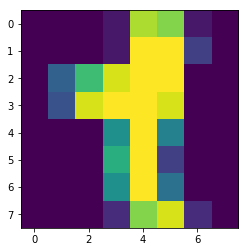

In [11]:
plt.imshow(mnist['images'][80])

In [12]:
from sklearn.neighbors import KNeighborsClassifier as Knc

In [13]:
knn=Knc()

In [14]:
from sklearn.cross_validation import train_test_split

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
X=mnist['data']
y=mnist['target']

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
knn.score(X_test, y_test)

0.9888888888888889

In [20]:
knn.kneighbors([X[80]])

(array([[ 0.        , 19.05255888, 19.4422221 , 19.84943324, 20.34698995]]),
 array([[994, 512, 292, 751, 877]]))

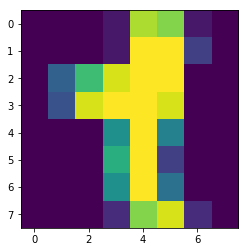

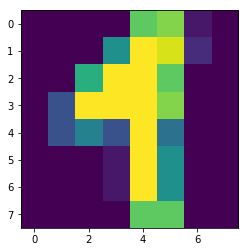

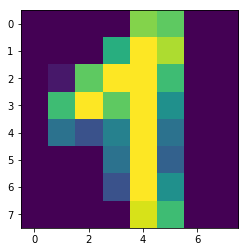

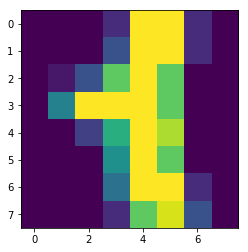

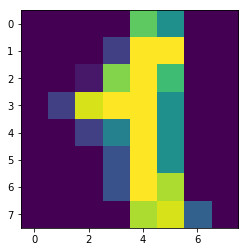

In [23]:
for i in knn.kneighbors([X[80]])[1][0]:
    plt.figure()
    plt.imshow(np.reshape(X_train[i], (8,8)))

## KNN avec le jeu de données